In [15]:
from PIL import Image
from PIL import ImageOps
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#Handling of UnidentifiedImageError
from PIL import UnidentifiedImageError

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from os import listdir
import os

## Filepaths and Images

In [3]:
#Filepaths to the directories 
path_cats = "E:\\CodersCrew\\Projekty\\DataScience\\Klasyfikator_Cat_Dog_2021\\Cat\\Cat-20211213T095549Z-001\\Cat"
path_dogs = "E:\\CodersCrew\\Projekty\\DataScience\\Klasyfikator_Cat_Dog_2021\\Dog\\Dog-20211213T100704Z-001\\Dog"

#create lists of images
cat_images_ar = listdir(path_cats)
dog_images_ar = listdir(path_dogs)

#number of images in the directories
number_of_cats = len(cat_images_ar)
number_of_dogs = len(dog_images_ar)

print("Number of cat images:",number_of_cats)
print("Number of dog images:",number_of_dogs)

Number of cat images: 12501
Number of dog images: 12501


## Cat images

In [4]:
#getting array with cat image sizes and an array with corrupted images/files

cat_image_sizes_ar = []
cat_images_df =pd.DataFrame(columns=["width","height",""])
cat_corrupted_images = []

for image in cat_images_ar:
    image_path = os.path.join(path_cats, image)
    try:
        image = Image.open(image_path)
    except UnidentifiedImageError:
            cat_corrupted_images.append(image)
            continue
    
    cat_image_sizes_ar.append(image.size)

In [5]:
#Corrupted images/files
#these files have to be deleted before using the directory as training data
cat_corrupted_images

['666.jpg', 'Thumbs.db']

In [6]:
#number of images where the size could be taken
len(cat_image_sizes_ar)

12499

In [7]:
#getting width and heigth

cat_image_widths_ar = []
cat_image_heights_ar = []
cat_image_size_as_string_ar = []

for size in cat_image_sizes_ar:
    width, height = size
    cat_image_widths_ar.append(width)
    cat_image_heights_ar.append(height)
    size_as_string = str(width)+"x"+str(height)
    cat_image_size_as_string_ar.append(size_as_string)
    

In [30]:
cat_sizes_dic = {"width":cat_image_widths_ar, "height":cat_image_heights_ar}
cat_sizes_df = pd.DataFrame(cat_sizes_dic)
cat_sizes_df

,width,height
0,500,375
1,300,281
2,489,500
3,403,500
4,150,150
...,...,...
12494,350,218
12495,392,420
12496,350,277
12497,340,260


### Width statistics

In [31]:
cat_sizes_df["width"].describe()

count    12499.000000
mean       410.838467
std        107.917131
min          4.000000
25%        334.000000
50%        470.000000
75%        500.000000
max        500.000000
Name: width, dtype: float64

### Height statistics

In [32]:
cat_sizes_df["height"].describe()

count    12499.000000
mean       356.940475
std         96.526943
min          4.000000
25%        300.000000
50%        375.000000
75%        407.000000
max        500.000000
Name: height, dtype: float64

Text(0.5, 1.0, 'Image heights')

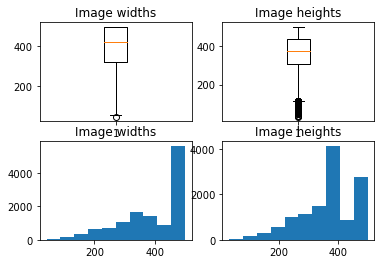

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(cat_image_widths_ar)
axs[0, 0].set_title('Image widths')
axs[0, 1].boxplot(cat_image_heights_ar)
axs[0, 1].set_title('Image heights')
axs[1, 0].hist(cat_image_widths_ar)
axs[1, 0].set_title('Image widths')
axs[1, 1].hist(cat_image_heights_ar)
axs[1, 1].set_title('Image heights')


Text(5, 420.0, '75 percintile')

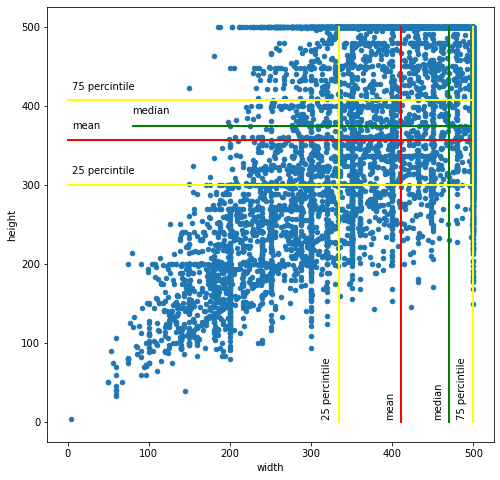

In [33]:
cat_sizes_df.plot("width","height", kind='scatter',figsize=(8,8))
# vertical lines for descriptive statistics
plt.plot([cat_sizes_df["width"].mean(), cat_sizes_df["width"].mean()], [0, 500], lw=2, color="red")
plt.plot([0, 500], [cat_sizes_df["height"].mean(), cat_sizes_df["height"].mean()], lw=2, color="red")
plt.plot([cat_sizes_df["width"].median(), cat_sizes_df["width"].median()], [0, 500], lw=2, color="green")
plt.plot([80, 500], [cat_sizes_df["height"].median(), cat_sizes_df["height"].median()], lw=2, color="green")
plt.plot([cat_sizes_df["width"].quantile(0.25), cat_sizes_df["width"].quantile(0.25)], [0, 500], lw=2, color="yellow")
plt.plot([0, 500], [cat_sizes_df["height"].quantile(0.25), cat_sizes_df["height"].quantile(0.25)], lw=2, color="yellow")
plt.plot([cat_sizes_df["width"].quantile(0.75), cat_sizes_df["width"].quantile(0.75)], [0, 500], lw=2, color="yellow")
plt.plot([0, 500], [cat_sizes_df["height"].quantile(0.75), cat_sizes_df["height"].quantile(0.75)], lw=2, color="yellow")

#width annotations
plt.text(cat_sizes_df["width"].quantile(0.25)-20,5, "25 percintile", fontdict=None, rotation="vertical")
plt.text(cat_sizes_df["width"].mean()-20,5, "mean", fontdict=None, rotation="vertical")
plt.text(cat_sizes_df["width"].median()-20,5, "median", fontdict=None, rotation="vertical")
plt.text(cat_sizes_df["width"].quantile(0.75)-20,5, "75 percintile", fontdict=None, rotation="vertical")

#height annotations
plt.text(5, cat_sizes_df["width"].quantile(0.25)-20, "25 percintile", fontdict=None, rotation="horizontal")
plt.text(5,cat_sizes_df["width"].mean()-40, "mean", fontdict=None, rotation="horizontal")
plt.text(80,cat_sizes_df["width"].median()-80, "median", fontdict=None, rotation="horizontal")
plt.text(5,cat_sizes_df["width"].quantile(0.75)-80, "75 percintile", fontdict=None, rotation="horizontal")


## Dog images

In [13]:
#Tasks to do:
#1 create boxplots + histograms
#2 analyze it (how many pictures are to smaLL?)
#3 do the same for the dog images

#4 test irfran + 

In [16]:
#getting array with dog image sizes and an array with corrupted images/files

dog_image_sizes_ar = []
dog_corrupted_images = []

for image in dog_images_ar:
    image_path = os.path.join(path_dogs, image)
    try:
        image = Image.open(image_path)
    except UnidentifiedImageError:
            dog_corrupted_images.append(image)
            continue
    
    dog_image_sizes_ar.append(image.size)

In [17]:
#Corrupted images/files
#these files have to be deleted before using the directory as training data
dog_corrupted_images

['11702.jpg', 'Thumbs.db']

In [18]:
#getting width and heigth

dog_image_widths_ar = []
dog_image_heights_ar = []
dog_image_size_as_string_ar = []

for size in dog_image_sizes_ar:
    width, height = size
    dog_image_widths_ar.append(width)
    dog_image_heights_ar.append(height)
    size_as_string = str(width)+"x"+str(height)
    dog_image_size_as_string_ar.append(size_as_string)


In [25]:
dog_sizes_dic = {"width":dog_image_widths_ar, "height":dog_image_heights_ar}
dog_sizes_df = pd.DataFrame(dog_sizes_dic)
dog_sizes_df

,width,height
0,500,375
1,327,500
2,269,293
3,500,398
4,500,375
...,...,...
12494,300,225
12495,350,262
12496,500,375
12497,331,500


### Width

In [26]:
dog_sizes_df["width"].describe()

count    12499.000000
mean       398.055924
std        109.704705
min         42.000000
25%        320.000000
50%        423.000000
75%        500.000000
max        500.000000
Name: width, dtype: float64

### Height

In [27]:
dog_sizes_df["height"].describe()

count    12499.000000
mean       365.038003
std         97.317093
min         33.000000
25%        307.000000
50%        375.000000
75%        434.500000
max        500.000000
Name: height, dtype: float64

Text(0.5, 1.0, 'Image heights')

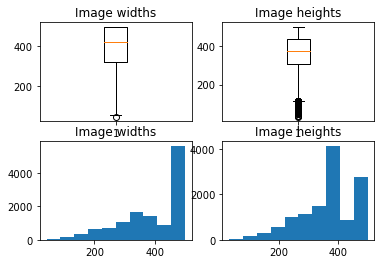

In [28]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(dog_image_widths_ar)
axs[0, 0].set_title('Image widths')
axs[0, 1].boxplot(dog_image_heights_ar)
axs[0, 1].set_title('Image heights')
axs[1, 0].hist(dog_image_widths_ar)
axs[1, 0].set_title('Image widths')
axs[1, 1].hist(dog_image_heights_ar)
axs[1, 1].set_title('Image heights')


Text(5, 191.0, '5 percintile')

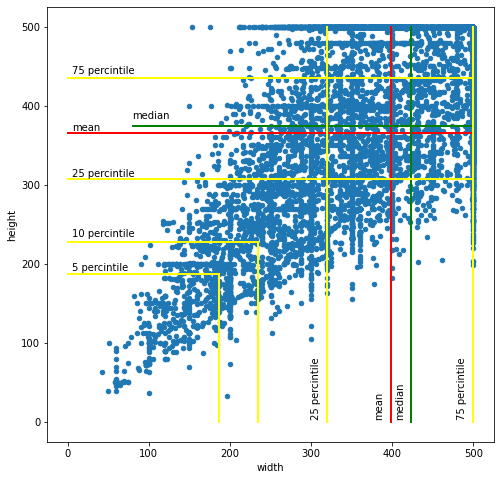

In [51]:

dog_sizes_df.plot("width","height", kind='scatter',figsize=(8,8))
# vertical lines for descriptive statistics
plt.plot([dog_sizes_df["width"].mean(), dog_sizes_df["width"].mean()], [0, 500], lw=2, color="red")
plt.plot([0, 500], [dog_sizes_df["height"].mean(), dog_sizes_df["height"].mean()], lw=2, color="red")
plt.plot([dog_sizes_df["width"].median(), dog_sizes_df["width"].median()], [0, 500], lw=2, color="green")
plt.plot([80, 500], [dog_sizes_df["height"].median(), dog_sizes_df["height"].median()], lw=2, color="green")
plt.plot([dog_sizes_df["width"].quantile(0.25), dog_sizes_df["width"].quantile(0.25)], [0, 500], lw=2, color="yellow")
plt.plot([0, 500], [dog_sizes_df["height"].quantile(0.25), dog_sizes_df["height"].quantile(0.25)], lw=2, color="yellow")
plt.plot([dog_sizes_df["width"].quantile(0.75), dog_sizes_df["width"].quantile(0.75)], [0, 500], lw=2, color="yellow")
plt.plot([0, 500], [dog_sizes_df["height"].quantile(0.75), dog_sizes_df["height"].quantile(0.75)], lw=2, color="yellow")

plt.plot([dog_sizes_df["width"].quantile(0.1), dog_sizes_df["width"].quantile(0.1)], [0, dog_sizes_df["height"].quantile(0.1)], lw=2, color="yellow")
plt.plot([0, dog_sizes_df["width"].quantile(0.1)], [dog_sizes_df["height"].quantile(0.1), dog_sizes_df["height"].quantile(0.1)], lw=2, color="yellow")

plt.plot([dog_sizes_df["width"].quantile(0.05), dog_sizes_df["width"].quantile(0.05)], [0, dog_sizes_df["width"].quantile(0.05)], lw=2, color="yellow")
plt.plot([0, dog_sizes_df["width"].quantile(0.05)], [dog_sizes_df["height"].quantile(0.05), dog_sizes_df["height"].quantile(0.05)], lw=2, color="yellow")


#width annotations
plt.text(dog_sizes_df["width"].quantile(0.25)-20,5, "25 percintile", fontdict=None, rotation="vertical")
plt.text(dog_sizes_df["width"].mean()-20,5, "mean", fontdict=None, rotation="vertical")
plt.text(dog_sizes_df["width"].median()-20,5, "median", fontdict=None, rotation="vertical")
plt.text(dog_sizes_df["width"].quantile(0.75)-20,5, "75 percintile", fontdict=None, rotation="vertical")

#height annotations
plt.text(5, dog_sizes_df["width"].quantile(0.25)-10, "25 percintile", fontdict=None, rotation="horizontal")
plt.text(5,dog_sizes_df["width"].mean()-30, "mean", fontdict=None, rotation="horizontal")
plt.text(80,dog_sizes_df["width"].median()-40, "median", fontdict=None, rotation="horizontal")
plt.text(5,dog_sizes_df["width"].quantile(0.75)-60, "75 percintile", fontdict=None, rotation="horizontal")
plt.text(5,dog_sizes_df["width"].quantile(0.1), "10 percintile", fontdict=None, rotation="horizontal")
plt.text(5,dog_sizes_df["width"].quantile(0.05)+5, "5 percintile", fontdict=None, rotation="horizontal")


# Teoria

### Sposoby na unifikacje wielkości zdjęć:
- Zero Padding
- Skalowanie
- Docięcie
- Irfran Batch Processing

### Zero Padding

Links: [Zero Padding](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0263-7)

__Skrócony opis__:<br>
Do obrazka dodajemy jako "ramkę" czarny obszar tak aby dopasować nasz obraz do zadanej wartości. <br>
Czarna ramka składa się z pikseli o wartości zero.

__Zalety__:
- w odróżnieniu od skalowanie, nie pociąga za sobą ryzyka deformacji wzorców na obrazku
- w porównaniu do skalowania poprawia wydajność obliczeniową <br>
__Wytłumaczenie:__ <br> The reason is that neighboring zero input units (pixels) will not activate their corresponding convolutional unit  in the next layer. <br> Therefore, the synaptic weights on outgoing links from input units do not need to be updated if they contain a zero value. <br>This is similar to a dropout that only concerns border pixels in the input layer. <br> This advantage will be lost if smaller images are enlarged by increasing their resolution (scaling) rather than zero-padding.<br><br>

Example of zero padding:

![](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs40537-019-0263-7/MediaObjects/40537_2019_263_Fig2_HTML.png?as=webp)

A small image (a) resized to 200 × 200 pixels using zero-padding (b) and interpolation (c) <br> <br>

### Skalowanie

Wady: Deformuje obraz a tym samym zmniejsza wydajność modelu

### Docięcie

Wady: Kluczowy obszar obrazka może zostać wycięty (w naszym przypadku Kot) wtedy taki obrazek robił by za szum, osłabiając jakośc modelu.

### Irfran Batch Processing

W zasadzie możemy podciągnąc pod skalowanie tylko że wykorzystujemy program IRFRAN.

Link: [IRFRAN BATCH PROCESSING](https://bnpositive.com/blog/how-to-use-irfanview-to-batch-process-image-files/)

# Ustalenia

- wybieramy rozmiar obrazków __500 x 500__
- metoda: __ZERO PADDING__
- biblioteka __KERAS__

__Do zrobienia na następny raz:__
- podział na zestaw treningowy i testowy
- wstępny model z dostosowaniem wielkości i klasyfikacją


Jeżeli coś brakuje dajcie znać to uzupełnie.